## 0. Importing Libraries

In [1]:
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.optimizers import Adam,SGD

## 1. Loading of the dataset

In [2]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

## 2. Preparation of the dataset

In [3]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

## 3. Definition of the model

In [4]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = Adam()  #by default learning_rate=0.001
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## 4. Model Training

In [5]:
# load dataset
trainX, trainY, testX, testY = load_dataset()

# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)

# split into training and validation sets (90% train, 10% validation)
X_train, X_val, y_train, y_val = train_test_split(
    trainX, trainY, test_size=0.1, random_state=1, shuffle=True
)

# define model
model = define_model()

# fit model using validation data
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9558 - loss: 0.1425 - val_accuracy: 0.9830 - val_loss: 0.0570
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9860 - loss: 0.0440 - val_accuracy: 0.9867 - val_loss: 0.0456
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 0.9903 - loss: 0.0314 - val_accuracy: 0.9863 - val_loss: 0.0454
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.9924 - loss: 0.0232 - val_accuracy: 0.9888 - val_loss: 0.0378
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.9940 - loss: 0.0187 - val_accuracy: 0.9882 - val_loss: 0.0419
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.9953 - loss: 0.0151 - val_accuracy: 0.9878 - val_loss: 0.0420
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9961 - loss: 0.0119 - val_accuracy: 0.9908 - val_loss: 0.0380
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.9968 -

In [6]:
# save model
model.save('mnist_cnn.keras')

## 5. Evaluation of the model

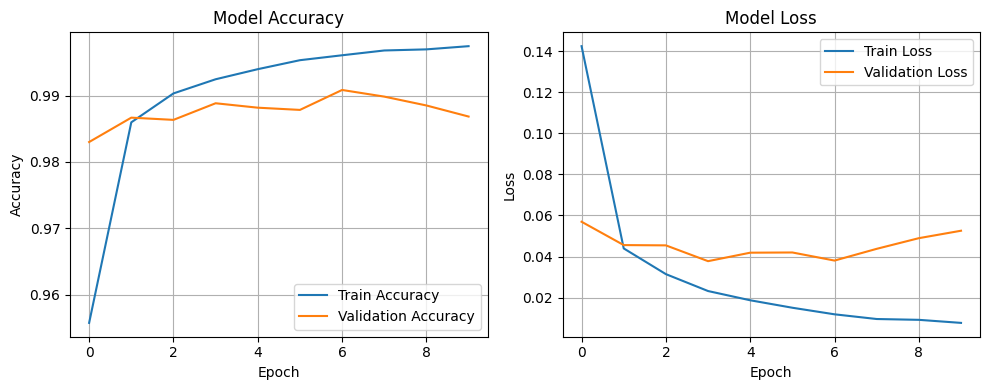

In [7]:
# plot accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [8]:
# evaluate model on test dataset
_, acc = model.evaluate(testX, testY, verbose=0)
print('Accuracy on test set: %.3f' % (acc * 100.0))

Accuracy on test set: 98.960


## 6. Model Test

In [9]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def load_image(filename):
    """Load, invert, normalize and reshape a single image for model prediction."""
    # load the image in grayscale and resize to 28x28
    img = load_img(filename, color_mode='grayscale', target_size=(28, 28))
    
    # convert to numpy array
    img = img_to_array(img)
    
    # invert colors (MNIST expects white digits on black background)
    img = 255 - img
    
    # normalize to [0, 1]
    img = img.astype('float32') / 255.0
    
    # reshape for model input (1, 28, 28, 1)
    img = np.expand_dims(img, axis=0)
    
    return img

In [10]:
# from tensorflow.keras.models import load_model

# # loading saved model
# model = load_model('mnist_cnn.keras')

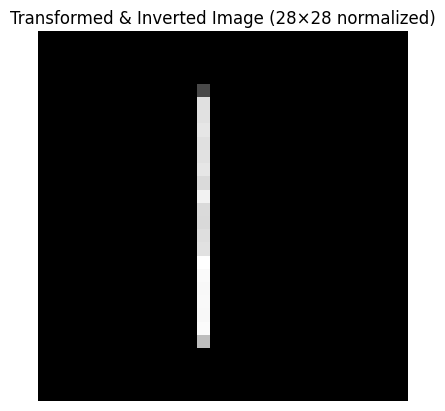

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Prediction: 1


In [11]:
# predict the class
filename = "Testing/1.png"
img = load_image(filename)
# show the transformed (inverted + normalized) image
plt.imshow(img[0].squeeze(), cmap='gray')
plt.title("Transformed & Inverted Image (28×28 normalized)")
plt.axis('off')
plt.show()
predict_value = model.predict(img)
#digit = predict_value
digit = np.argmax(predict_value)
print("Prediction:",digit)

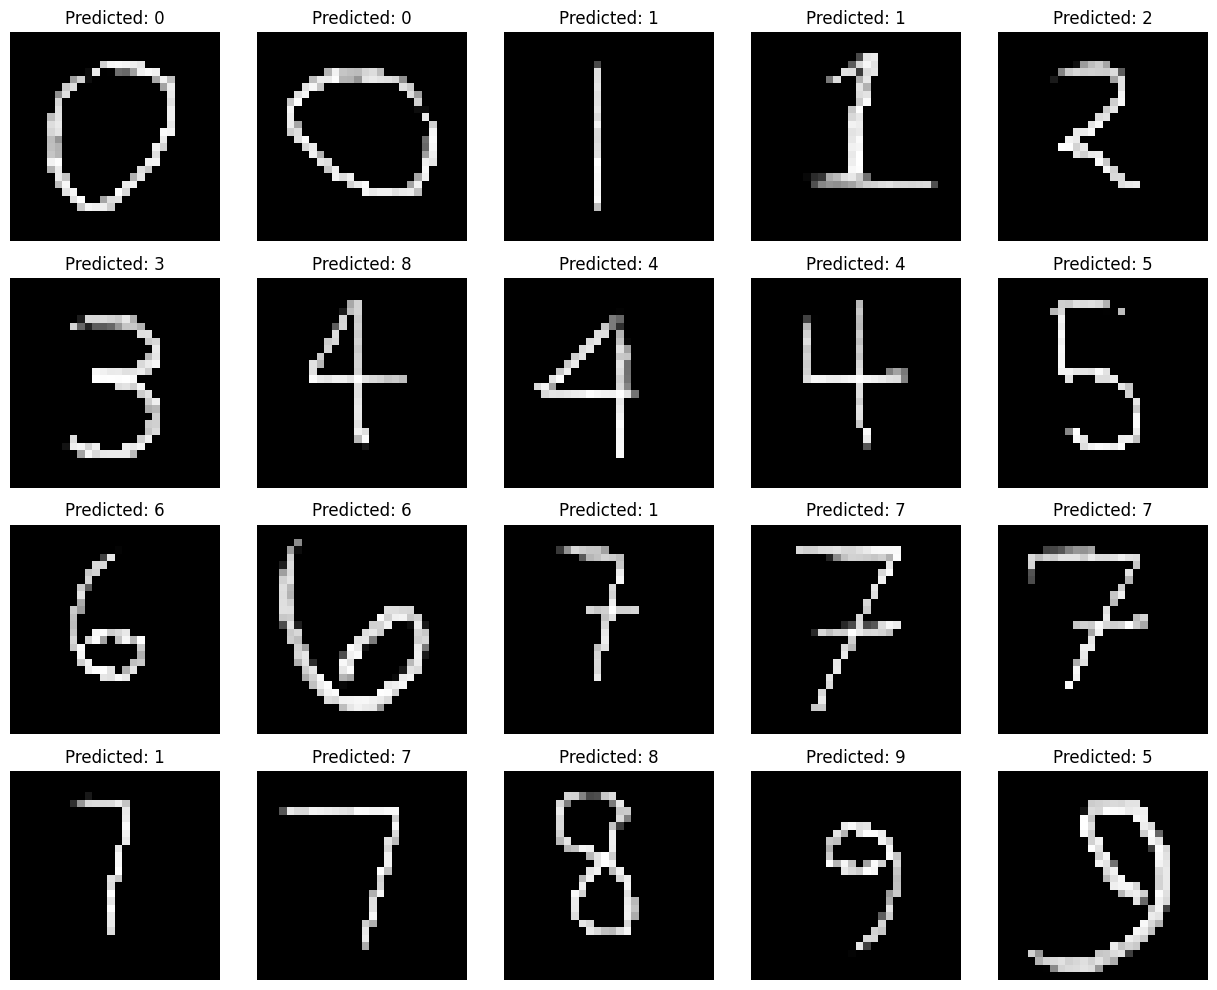

In [14]:
#Prediction on more images
import os
test_dir = "Testing"
image_files = sorted([f for f in os.listdir(test_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

rows, cols = 4, 5
image_files = image_files[:rows * cols]  # limit to 12

plt.figure(figsize=(cols * 2.5, rows * 2.5))
for i, fname in enumerate(image_files):
    path = os.path.join(test_dir, fname)
    try:
        img = load_image(path)
        predict_value = model.predict(img, verbose=0)
        digit = np.argmax(predict_value)

        plt.subplot(rows, cols, i + 1)
        plt.imshow(img[0].squeeze(), cmap='gray')
        plt.title(f"Predicted: {digit}")
        plt.axis('off')
    except Exception as e:
        print(f"Skipping {fname}: {e}")

plt.tight_layout()
plt.show()